# Imports & setup

In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/health-index'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the dataset
## this is a deblurred biom table of the non-specific bacteria (common to multiple disease) from:
### "Meta-analysis defines predominant shared microbial responses in various diseases and a specific inflammatory bowel disease signal"
Abbas-Egbariya, H., Haberman, Y., Braun, T., Hadar, R., Denson, L., Gal-Mor, O., & Amir, A. (2022).
Genome Biology 23.1 (2022): 1-23.

https://doi.org/10.1186/s13059-022-02637-7

In [7]:
dat=ca.read_amplicon('./nonspecific-withbloom.biom','./nonspecific-withbloom_sample.txt',feature_metadata_file='./nonspecific-withbloom_feature.txt',
                     normalize=10000,min_reads=0)
dat

2022-06-29 11:06:43 INFO loaded 28 samples, 131 features
2022-06-29 11:06:43 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-29 11:06:43 INFO After filtering, 3 remain.


AmpliconExperiment with 3 samples, 131 features

### The feature metadata is following the result of identifying the up/down regulated disease associated bacteria that appear in many diseases
esize<0 means down-regulated in disease

esize>0 means up-regulated in disease

### Set up the feature metadata fields to emulate as if the results originate from the AmpliconExperiment.diff_abundance() function
(in realty they come from a binary test on the NRMD in the disease cohorts)

In [8]:
dat.feature_metadata['_calour_direction']='health'
dat.feature_metadata.loc[dat.feature_metadata['esize']>0,'_calour_direction']='disease'

In [9]:
dat.feature_metadata['_calour_stat']=dat.feature_metadata['esize']*-1

In [10]:
healthy=dat.filter_by_metadata('_calour_direction',['health'],axis='f')
healthy

AmpliconExperiment with 3 samples, 97 features

In [11]:
disease=dat.filter_by_metadata('_calour_direction',['disease'],axis='f')
disease

AmpliconExperiment with 3 samples, 34 features

In [12]:
dat=dat.sort_by_metadata('_calour_direction',axis='f')

### dbBact terms enriched in the healthy/disease bacteria

2022-06-29 11:06:44 INFO Getting dbBact annotations for 131 sequences, please wait...
2022-06-29 11:06:44 INFO Limited to maximal annotationid: 7440
2022-06-29 11:06:47 INFO got 3197 annotations
2022-06-29 11:06:47 WARNING ignoring 3 annotation with id > max_id 7440
2022-06-29 11:06:47 INFO Got 23911 annotation-sequence pairs
2022-06-29 11:06:47 INFO Added annotation data to experiment. Total 3194 annotations, 131 ASVs
2022-06-29 11:06:52 INFO found 10 negative
2022-06-29 11:06:54 INFO found 10 positive


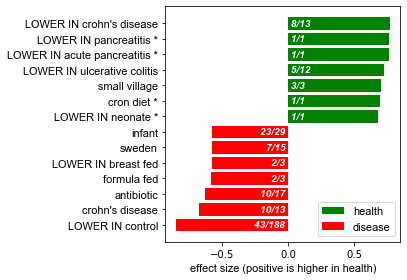

In [13]:
f,e=dat.plot_diff_abundance_enrichment(labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=10,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()

In [14]:
f.figure.savefig('./fig-terms-all.pdf')

In [15]:
e.save('./table-terms-all')

2022-06-29 11:06:54 INFO Metadata field taxonomy not found. Saving biom table without metadata


### non-human dbBact terms enriched in healthy/disease
We use the focus_negate list to specify to ignore dbBact annotations containing at least one of these terms

So the analysis is performed only on non-human annotation

2022-06-29 11:07:01 INFO found 7 negative
2022-06-29 11:07:01 INFO found 7 positive


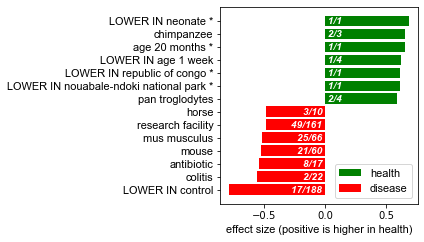

In [16]:
f,e=dat.plot_diff_abundance_enrichment(focus_negate=['homo sapiens'],labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()

In [17]:
f.figure.savefig('./fig-terms-nonhuman.pdf')

In [18]:
e.save('./table-terms-nonhuman')

2022-06-29 11:07:02 INFO Metadata field taxonomy not found. Saving biom table without metadata


2022-06-26 14:49:56 INFO found 14 annotations with the term ['chimpanzee']
2022-06-26 14:49:56 INFO annotation 4916 is low
2022-06-26 14:49:57 INFO ignored 0 annotations
2022-06-26 14:49:57 WARNING Clipped term circle size to 250. Real size (number of term seqs not overlapping) should be: 1573


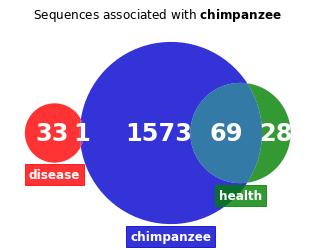

In [26]:
f=db.plot_term_venn_all('chimpanzee',dat,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':24},max_size=250,max_id=7440)
f.savefig('./fig-venn-chimpanzee.pdf')

### Can also look at enriched annotations instead of terms

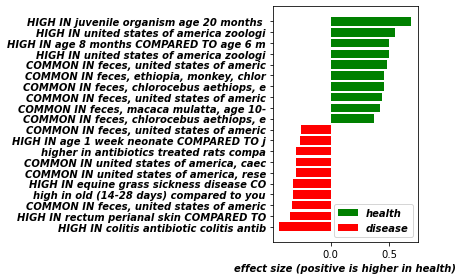

In [27]:
f,e=dat.plot_diff_abundance_enrichment(focus_negate=['homo sapiens'],term_type='annotation')

In [28]:
e.feature_metadata[:20]

,term,odif,pvals,num_enriched_exps,num_total_exps
HIGH IN colitis antibiotic colitis antibiotics induced colitis COMPARED TO control IN feces united states of america equus caballus horse adult organism [7350],HIGH IN colitis antibiotic colitis antibiotics...,-0.436628,0.000999,-1.0,-1.0
HIGH IN rectum perianal skin COMPARED TO external acoustic meatus ear canal IN united states of america wild santa catalina island urocyon littoralis urocyon littoralis catalinae santa catalina island fox [4567],HIGH IN rectum perianal skin COMPARED TO exter...,-0.349909,0.000999,-1.0,-1.0
"COMMON IN feces, united states of america, research facility, rattus norvegicus, rat, [2852]","COMMON IN feces, united states of america, res...",-0.332323,0.000999,-1.0,-1.0
high in old (14-28 days) compared to young (0-3 day) chickens (HIGH IN age old age COMPARED TO young age IN united states of america caecum gallus gallus chicken ) [994],high in old (14-28 days) compared to young (0-...,-0.323529,0.000999,-1.0,-1.0
HIGH IN equine grass sickness disease COMPARED TO control IN feces farm equus caballus horse united kingdom [3414],HIGH IN equine grass sickness disease COMPARED...,-0.323529,0.000999,-1.0,-1.0
"COMMON IN united states of america, research facility, caecum, state of ohio, meleagris gallopavo, wild turkey, [6862]","COMMON IN united states of america, research f...",-0.294118,0.000999,-1.0,-1.0
"COMMON IN united states of america, caecum, gallus gallus, chicken, age 14-28 days, [997]","COMMON IN united states of america, caecum, ga...",-0.294118,0.000999,-1.0,-1.0
higher in antibiotics treated rats compared to controls (HIGH IN antibiotic ampicillin neomycin COMPARED TO control IN feces research facility caecum rattus norvegicus sprague dawley switzerland rat ) [3312],higher in antibiotics treated rats compared to...,-0.294118,0.000999,-1.0,-1.0
HIGH IN age 1 week neonate COMPARED TO juvenile organism age 20 months IN feces united states of america research facility macaca mulatta state of washington monkey [7143],HIGH IN age 1 week neonate COMPARED TO juvenil...,-0.264706,0.000999,-1.0,-1.0
"COMMON IN feces, united states of america, canis lupus familiaris, iowa, [556]","COMMON IN feces, united states of america, can...",-0.252881,0.000999,-1.0,-1.0


In [29]:
e.feature_metadata[-20:]

,term,odif,pvals,num_enriched_exps,num_total_exps
"COMMON IN feces, united states of america, zoological garden, pan troglodytes, chimpanzee, saint louis, saint louis zoo, [4913]","COMMON IN feces, united states of america, zoo...",0.329897,0.000999,-1.0,-1.0
"COMMON IN feces, united states of america, zoological garden, gorilla gorilla, saint louis, saint louis zoo, [4905]","COMMON IN feces, united states of america, zoo...",0.329897,0.000999,-1.0,-1.0
"COMMON IN caecum, left colon, right colon, sus scrofa, pig, united kingdom, [1709]","COMMON IN caecum, left colon, right colon, sus...",0.332929,0.000999,-1.0,-1.0
"COMMON IN feces, infant, macaca mulatta, age < 1 year, cayo santiago, puerto rico, rectal swab, indian rhesus macaque, [6111]","COMMON IN feces, infant, macaca mulatta, age <...",0.332929,0.000999,-1.0,-1.0
"COMMON IN feces, united states of america, state of tennessee, zoological garden, pan troglodytes, chimpanzee, [2834]","COMMON IN feces, united states of america, sta...",0.340206,0.000999,-1.0,-1.0
"COMMON IN feces, united states of america, zoological garden, pan troglodytes, chicago, chimpanzee, lincoln park zoo, [4911]","COMMON IN feces, united states of america, zoo...",0.340206,0.000999,-1.0,-1.0
HIGH IN caecum ascending colon COMPARED TO ileum IN control research facility sus scrofa male canada pig age 6 weeks male organism province of alberta [5397],HIGH IN caecum ascending colon COMPARED TO ile...,0.340206,0.000999,-1.0,-1.0
"COMMON IN feces, united states of america, zoological garden, gorilla gorilla, chicago, lincoln park zoo, [4903]","COMMON IN feces, united states of america, zoo...",0.340206,0.000999,-1.0,-1.0
lower in small intestine compared to colon in pigs (HIGH IN caecum left colon right colon COMPARED TO duodenum jejunum ileum IN sus scrofa pig united kingdom ) [1705],lower in small intestine compared to colon in ...,0.360825,0.000999,-1.0,-1.0
HIGH IN 3-month-old human stage COMPARED TO age 1 month IN feces united states of america research facility macaca mulatta monkey captive rhesus macaque [5375],HIGH IN 3-month-old human stage COMPARED TO ag...,0.363857,0.000999,-1.0,-1.0


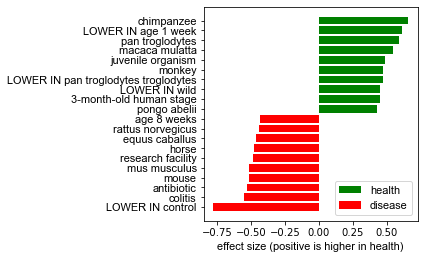

In [28]:
f,e=dat.plot_diff_abundance_enrichment(focus_negate=['homo sapiens'],labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440, min_exps=2)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()

In [29]:
e.feature_metadata[:40]

,term,odif,pvals,num_enriched_exps,num_total_exps
LOWER IN control,LOWER IN control,-0.779260,0.000999,-1.0,-1.0
colitis,colitis,-0.554882,0.000999,-1.0,-1.0
antibiotic,antibiotic,-0.534566,0.000999,-1.0,-1.0
mouse,mouse,-0.520012,0.000999,-1.0,-1.0
mus musculus,mus musculus,-0.512735,0.000999,-1.0,-1.0
research facility,research facility,-0.484536,0.000999,-1.0,-1.0
horse,horse,-0.478169,0.000999,-1.0,-1.0
equus caballus,equus caballus,-0.461795,0.000999,-1.0,-1.0
rattus norvegicus,rattus norvegicus,-0.445421,0.000999,-1.0,-1.0
age 8 weeks,age 8 weeks,-0.432990,0.000999,-1.0,-1.0


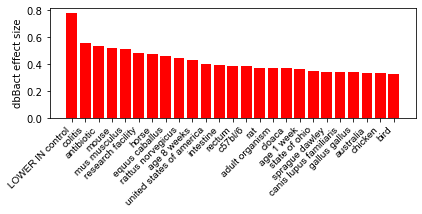

In [76]:
f=plt.figure()
data = e.feature_metadata[:25]
plt.bar(np.arange(len(data)),-1*data['odif'],color='red')
ax=plt.gca()
ax.set_xticks(np.arange(len(data)))
labs = [x.strip() for x in data['term'].values]
ax.set_xticklabels(labs,rotation=45,ha='right',family='Arial',size=10)
plt.ylabel('dbBact effect size')
plt.tight_layout()
ax.set_aspect(0.3/ax.get_data_ratio())
f.savefig('./fig-bar-terms-nonhuman-disease.pdf')

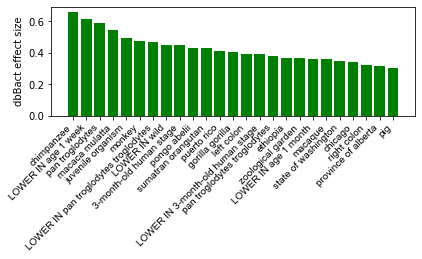

In [77]:
f=plt.figure()
data = e.feature_metadata[-1:-26:-1]
plt.bar(np.arange(len(data)),data['odif'],color='g')
ax=plt.gca()
ax.set_xticks(np.arange(len(data)))
labs = [x.strip() for x in data['term'].values]
ax.set_xticklabels(labs,rotation=45,ha='right',family='Arial',size=10)
plt.ylabel('dbBact effect size')
plt.tight_layout()
ax.set_aspect(0.3/ax.get_data_ratio())
f.savefig('./fig-bar-terms-nonhuman-health.pdf')